# Naive Bayes (from scratch)

In [924]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from IPython.display import display, Math

### Generating random observations

In [925]:
A = np.random.normal(size=(211, 2))
B = np.random.normal(size=(221, 2)) + (3, 0)
C = np.random.normal(size=(199, 2)) + (2, 3)
ABC = np.concatenate((A, B, C))

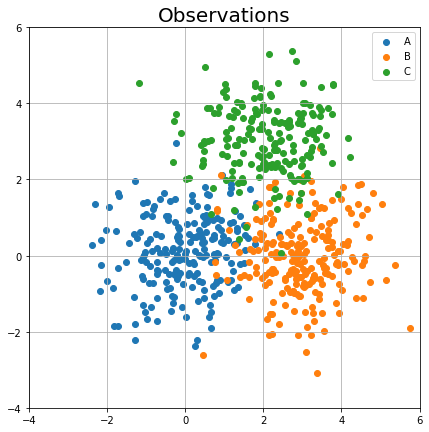

In [926]:
plt.subplots(figsize=(7, 7))
plt.scatter(A[:, 0], A[:, 1], label="A")
plt.scatter(B[:, 0], B[:, 1], label="B")
plt.scatter(C[:, 0], C[:, 1], label="C")
plt.ylim(-4, 6)
plt.xlim(-4, 6)
plt.title("Observations", {'fontsize':20})
plt.grid()
plt.legend()

### Value to predict

In [929]:
X = np.array([1.3, 0.9])

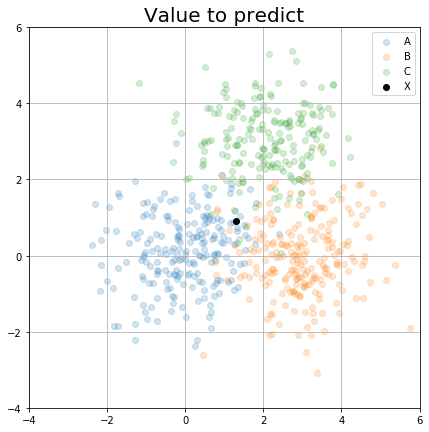

In [930]:
plt.subplots(figsize=(7, 7))
plt.scatter(A[:, 0], A[:, 1], label="A", alpha=0.2)
plt.scatter(B[:, 0], B[:, 1], label="B", alpha=0.2)
plt.scatter(C[:, 0], C[:, 1], label="C", alpha=0.2)
plt.scatter(X[0], X[1], label="X", c="k")
plt.ylim(-4, 6)
plt.xlim(-4, 6)
plt.title("Value to predict", {'fontsize':20})
plt.grid()
plt.legend()

### Calculating prior probabilities

In [931]:
P_A = len(A) / len(ABC)
P_B = len(B) / len(ABC)
P_C = len(C) / len(ABC)

display(Math(r'P( \textrm{class}) = \frac{ \textrm{class observations} }{ \textrm{total observations} }'))
display(Math(r'P(A) = \frac{%d}{%d} \approx %.2f' % (len(A), len(ABC), P_A)))
display(Math(r'P(B) = \frac{%d}{%d} \approx %.2f' % (len(B), len(ABC), P_B)))
display(Math(r'P(C) = \frac{%d}{%d} \approx %.2f' % (len(C), len(ABC), P_C)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Selecting similar observations

In [932]:
R = 0.7
Ar = A[(cdist([X], A) <= R)[0], :]
Br = B[(cdist([X], B) <= R)[0], :]
Cr = C[(cdist([X], C) <= R)[0], :]

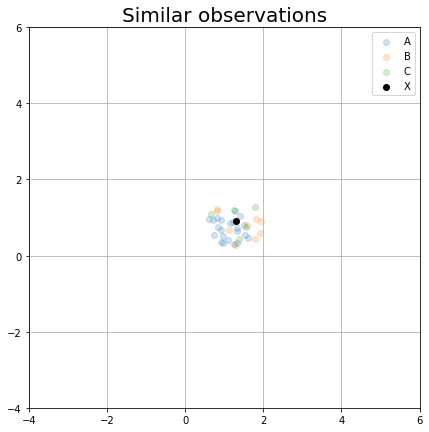

In [933]:
plt.subplots(figsize=(7, 7))
plt.scatter(Ar[:, 0], Ar[:, 1], label="A", alpha=0.2)
plt.scatter(Br[:, 0], Br[:, 1], label="B", alpha=0.2)
plt.scatter(Cr[:, 0], Cr[:, 1], label="C", alpha=0.2)
plt.scatter([X[0]], [X[1]], label="X", c="k")
plt.ylim(-4, 6)
plt.xlim(-4, 6)
plt.title("Similar observations", {'fontsize':20})
plt.grid()
plt.legend()

### Calculating likelihood

In [934]:
P_XA = len(Ar) / len(A)
P_XB = len(Br) / len(B)
P_XC = len(Cr) / len(C)

display(Math(r'P(X \vert \textrm{class}) = \frac{ \textrm{class observations among similars} }{ \textrm{class observations} }'))
display(Math(r'P(X \vert A) = \frac{%d}{%d} \approx %.3f' % (len(Ar), len(A), P_XA)))
display(Math(r'P(X \vert B) = \frac{%d}{%d} \approx %.3f' % (len(Br), len(B), P_XB)))
display(Math(r'P(X \vert C) = \frac{%d}{%d} \approx %.3f' % (len(Cr), len(C), P_XC)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculating marginal likelihood

In [935]:
P_X = (len(Ar) + len(Br) + len(Cr)) / len(ABC)

display(Math(r'P(X) = \frac{ \textrm{observations among similars} }{ \textrm{total observations} }'))
display(Math(r'P(X) = \frac{%d}{%d} \approx %.3f' % (len(Ar) + len(Br) + len(Cr), len(ABC), P_X)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Calculating posterior probability

In [936]:
P_AX = P_XA * P_A / P_X
P_BX = P_XB * P_B / P_X
P_CX = P_XC * P_C / P_X

display(Math(r'P(\textrm{class} \vert X) = \frac{P(X \vert class) \cdot P(class)}{P(X)}'))
display(Math(r'P(A \vert X) = {}'.format(round(P_AX, 3))))
display(Math(r'P(B \vert X) = {}'.format(round(P_BX, 3))))
display(Math(r'P(C \vert X) = {}'.format(round(P_CX, 3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [937]:
display(Math(r'P(A \vert X) + P(B \vert X) + P(C \vert X) = {}'.format(round(P_AX + P_BX + P_CX, 3))))

<IPython.core.display.Math object>

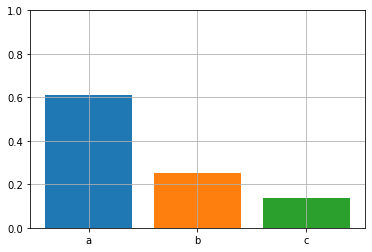

In [938]:
plt.bar("a", P_AX)
plt.bar("b", P_BX)
plt.bar("c", P_CX)
plt.ylim(0, 1)
plt.grid()